In [23]:
# 载入需要用到的包和数据
%config InlineBackend.figure_format = 'retina'
import tensorflow as tf
import idx2numpy
import matplotlib.pyplot as plt
import numpy as np
import pickle

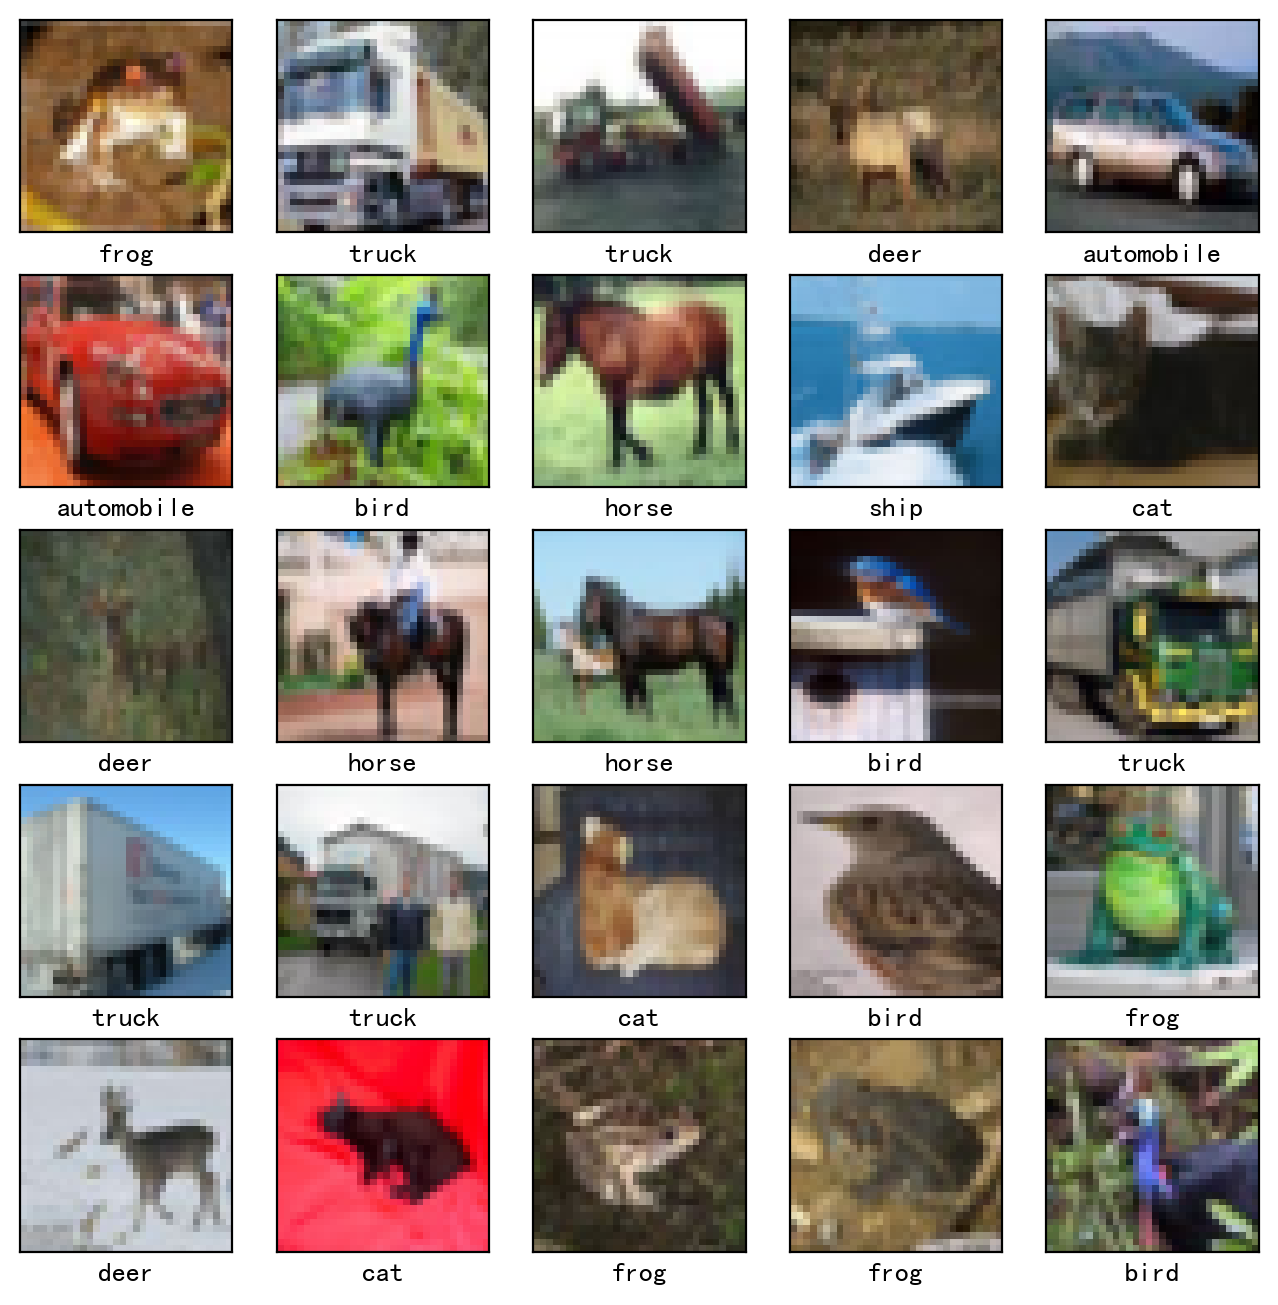

In [24]:
# 加载训练数据
n_batches = 5
train_images = np.empty((0,32,32,3))
train_labels = np.empty((0,10))
valid_images = np.empty((0,32,32,3))
valid_labels = np.empty((0,10))

# 加载每一批训练数据
for batch_i in range(1,n_batches+1):
    with open('./DataSets/cifar10/cifar-10-batches-py' + '/data_batch_' +str(batch_i), mode='rb') as file:
        batch = pickle.load(file,encoding='latin1')
    # 数据的原始维度是3×32×32，需要把数据变换成32×32×3
    images = batch['data'].reshape((len(batch['data']),3,32,32)).transpose(0,2,3,1)/255
    labels = batch['labels']
    
    # 计算验证集的样本数
    validation_count = int(len(images)*0.1)
    
    # 将训练集和验证集分别放入训练图像和训练标签中
    train_images = np.append(train_images, images[:-validation_count], axis=0)
    train_labels = np.append(train_labels, labels[:-validation_count])
    valid_images = np.append(valid_images, images[-validation_count:], axis=0)
    valid_labels = np.append(valid_labels, labels[-validation_count:])
    
# 加载测试数据
with open('./cifar10/cifar-10-batches-py' + '/test_batch', mode='rb') as file:
    batch = pickle.load(file, encoding='latin1')
    
# 测试数据
test_images = batch['data'].reshape((len(batch['data']),3,32,32)).transpose(0,2,3,1)/255
test_labels = np.array(batch['labels'])

# 定义类别名称
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 绘制训练数据
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(train_labels[i])])
plt.show()

In [25]:
# 定义一个CNN模型，用于CIFAR-10分类
cifar10_cnn_model = tf.keras.models.Sequential([
    # 第一个卷积层，卷积核大小为3*3，步长为1，填充方式为same，激活函数为relu，输入shape为32*32*3
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)),\
    # 第二个卷积层，卷积核大小为3*3，步长为1，填充方式为same，激活函数为relu
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1),padding='same',activation='relu'),\
    # 第一个池化层，池化核大小为2*2
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),\
    # 第三个卷积层，卷积核大小为3*3，步长为1，填充方式为same，激活函数为relu，输入shape为32*32*3
    tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)),\
    # 第四个卷积层，卷积核大小为3*3，步长为1，填充方式为same，激活函数为relu
    tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)),\
    # 第二个池化层，池化核大小为2*2
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),\
    # 第五个卷积层，卷积核大小为3*3，步长为1，填充方式为same，激活函数为relu，输入shape为32*32*3
    tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)),\
    # 第六个卷积层，卷积核大小为3*3，步长为1，填充方式为same，激活函数为relu
    tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)),\
    # 第三个池化层，池化核大小为2*2
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),\
    # 第七个卷积层，卷积核大小为3*3，步长为1，填充方式为same，激活函数为relu，输入shape为32*32*3
    tf.keras.layers.Conv2D(256, kernel_size=(3,3), strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)),\
    # 第八个卷积层，卷积核大小为3*3，步长为1，填充方式为same，激活函数为relu
    tf.keras.layers.Conv2D(256, kernel_size=(3,3), strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)),\
    # 将多维输入转换为一维
    tf.keras.layers.Flatten(),\
    # 第一个全连接层，激活函数为relu
    tf.keras.layers.Dense(512, activation='relu'),\
    # 第一个Dropout层，比例为0.5
    tf.keras.layers.Dropout(0.5),\
    # 第二个全连接层，激活函数为softmax
    tf.keras.layers.Dense(10, activation='softmax')
])
# 打印模型概述
cifar10_cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                  

In [26]:
# 定义CIFAR-10的CNN模型
cifar10_cnn_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 使用训练集、验证集和测试集训练模型，训练10个epoch，每次训练64个batch
cifar10_cnn_history = cifar10_cnn_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(valid_images, valid_labels), verbose=0)
# 评估模型在测试集上的准确率
cifar10_cnn_model.evaluate(test_images, test_labels)

313/313 [==============================] - 9s 28ms/step - loss: 0.7912 - accuracy: 0.7499


[0.7912253737449646, 0.7498999834060669]

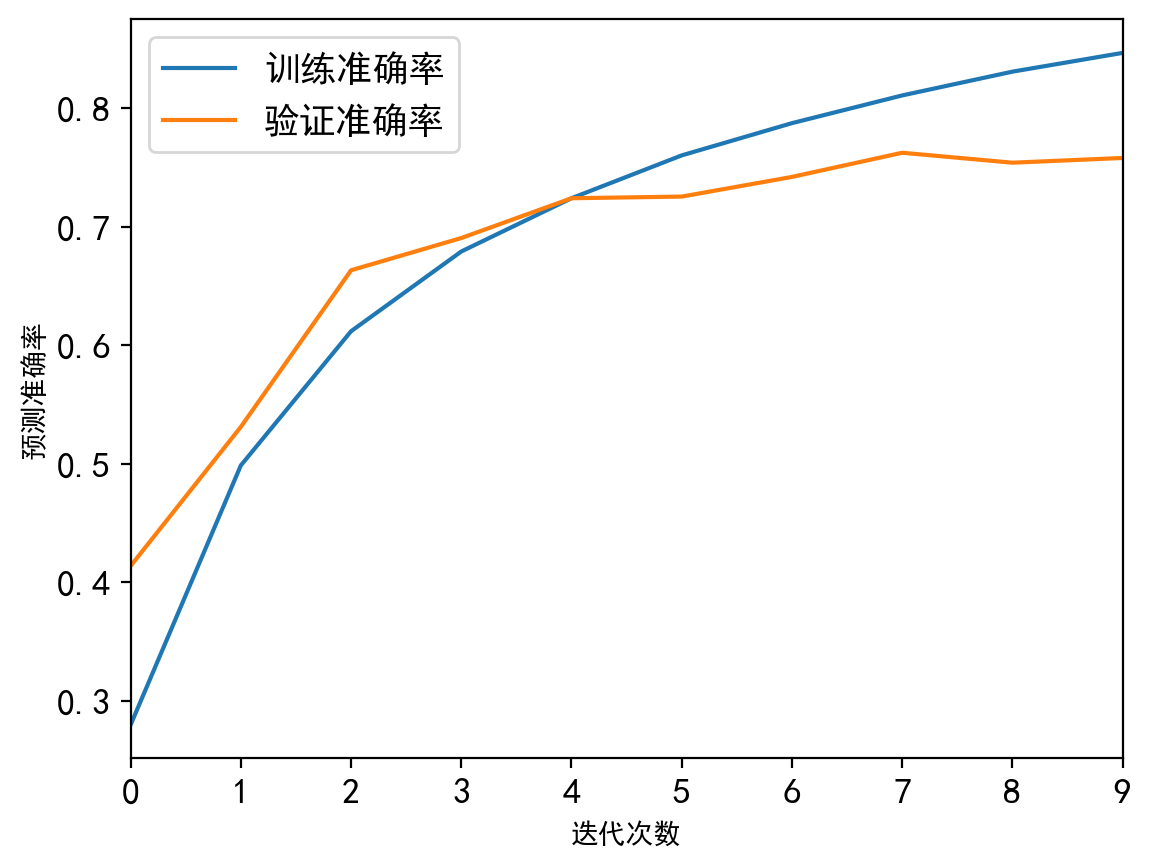

In [27]:
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.plot(cifar10_cnn_history.epoch, cifar10_cnn_history.history['accuracy'], label="训练准确率")
plt.plot(cifar10_cnn_history.epoch, cifar10_cnn_history.history['val_accuracy'], label="验证准确率")

plt.xlabel("迭代次数")
plt.ylabel("预测准确率")
_ = plt.legend(fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim([0, max(cifar10_cnn_history.epoch)])
plt.show()

In [28]:
# 加载cifar10_cnn_model模型
predictions = cifar10_cnn_model.predict(test_images)
# 预测test_images的标签
predictions.shape

313/313 [==============================] - 9s 27ms/step


(10000, 10)

In [29]:
# 定义函数plot_image，用于绘制图片
def plot_image(i, predictions_array, true_label, img):
    # 获取预测结果
    predictions_array = predictions_array[i]
    # 获取真实标签
    true_label = true_label[i]
    # 获取图片
    img =img[i]
    
    # 设置图片不显示网格
    plt.grid(False)
    # 设置x轴和y轴的刻度为空
    plt.xticks([])
    plt.yticks([])
    
    # 绘制图片
    plt.imshow(img, cmap=plt.cm.binary)
    
    # 获取预测结果中概率最高的标签
    predicted_label = np.argmax(predictions_array)
    # 如果预测结果和真实标签相同，则颜色为蓝色，否则为红色
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    # 绘制标签
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]), color=color)
    
# 定义函数plot_value_array，用于绘制概率分布
def plot_value_array(i,predictions_array, true_label):
    # 获取预测结果
    predictions_array = predictions_array[i]
    # 获取真实标签
    true_label = true_label[i]
    
    # 设置图片不显示网格
    plt.grid(False)
    # 设置x轴和y轴的刻度为空
    plt.xticks([])
    plt.yticks([])
    # 绘制概率分布
    thisplot = plt.bar(range(10),predictions_array,color="#777777")
    
    # 设置y轴范围
    plt.ylim([0,1])
    # 获取预测结果中概率最高的标签
    predicted_label = np.argmax(predictions_array)
    
    # 设置概率最高的标签颜色为红色，真实标签颜色为蓝色
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

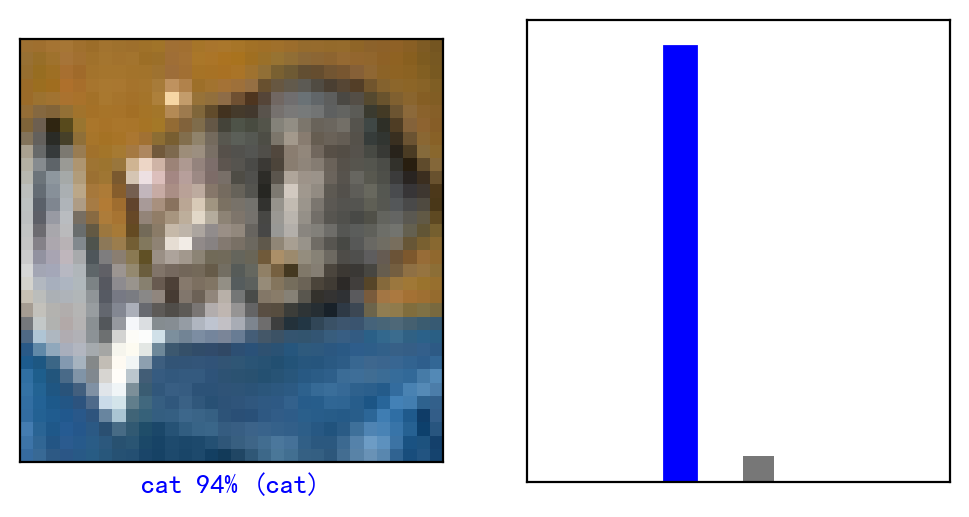

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

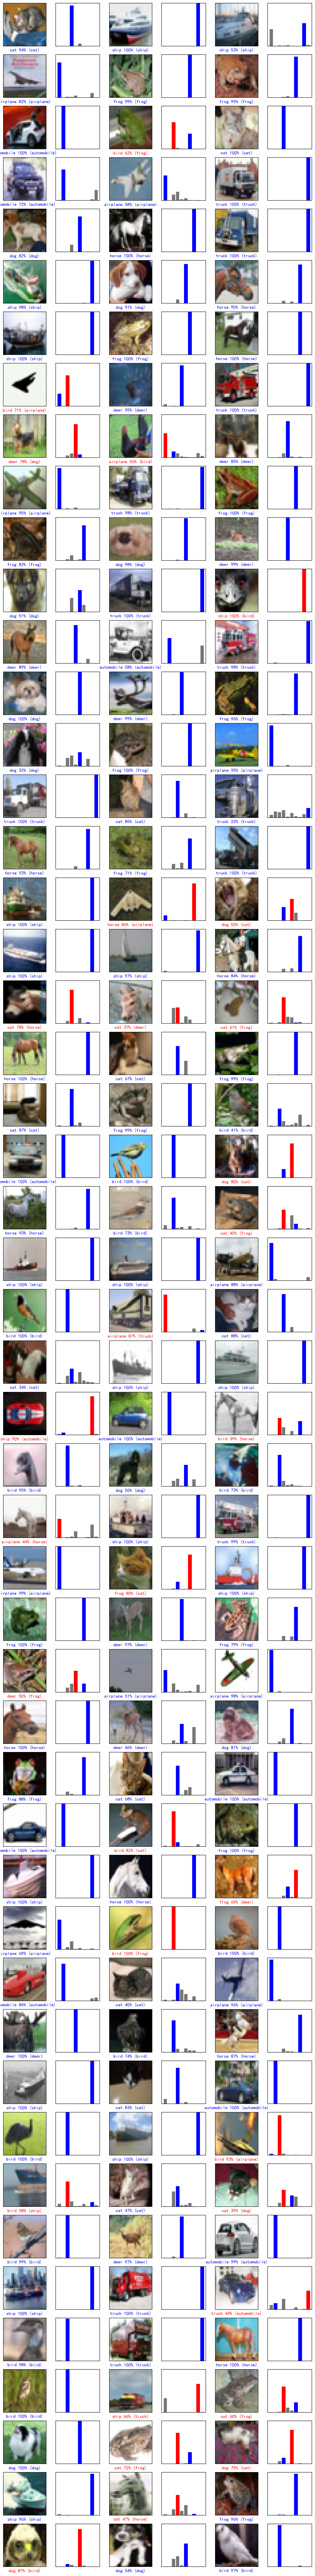

In [31]:
num_rows = 50
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_labels)
plt.show()